In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install translate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:00:010m


In [5]:
import math
import os
import warnings

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
# import session_info
from scipy import stats
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn import set_config
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix,make_scorer,recall_score)
from sklearn.model_selection import (train_test_split, RepeatedKFold, RepeatedStratifiedKFold,
                                     cross_validate, cross_val_score, KFold)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from translate import Translator
from sklearn.preprocessing import MinMaxScaler
import nltk
import re
# import emoji
import unicodedata
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
import nltk
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import f1_score
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
# Configuraciones
sns.set_style('dark')
pd.set_option("display.max_columns", 100)
pio.templates.default = "plotly_dark"
set_config(transform_output="pandas")
set_config(display='diagram')
warnings.filterwarnings("ignore")

# Magic Commands
%matplotlib inline

random.seed(12)

In [19]:
df = pd.read_excel("nosconocemos (1).xlsx")

In [20]:
df.head()

,id,¿Cuántas selfies en promedio te tomas por semana?,¿Cuál es la temperatura con la que sueles bañarte?,¿Cuántos minutos tardas en bañarte?,¿Te gusta bailar?,¿Cuál es tu género de película favorito?,¿Cuántas cervezas (350ml aprox.) tomas en una fiesta? (0 indica abstinencia),¿Cuántos piercings tienes?,¿Cuántos tatuajes tienes?,¿Cuántas mascotas tienes?,¿Algo más que desees agregar?,¿Con qué genero te identificas más?
0,6,1,Ambas,20,Si,Acción,3,0,0,5,2 son chinchillas,Hombre
1,7,2,Caliente,20,Si,Drama,4,0,0,5,Gatos,Hombre
2,8,0,Caliente,20,Si,Comedia,5,0,0,3,El karaoke no puede faltar,Mujer
3,9,1,Caliente,10,Si,Comedia,4,0,0,0,No,Hombre
4,10,1,Caliente,20,Si,Acción,12,0,0,3,no,Hombre


In [21]:
df.drop("id", axis=1, inplace=True)
df["¿Con qué genero te identificas más?"] = df["¿Con qué genero te identificas más?"].replace({"Hombre": 0, "Mujer": 1})

In [22]:
df.columns

Index(['¿Cuántas selfies en promedio te tomas por semana?',
       '¿Cuál es la temperatura con la que sueles bañarte?',
       '¿Cuántos minutos tardas en bañarte?', '¿Te gusta bailar?',
       '¿Cuál es tu género de película favorito?',
       '¿Cuántas cervezas (350ml aprox.)   tomas en una fiesta? (0 indica abstinencia)',
       '¿Cuántos piercings tienes?', '¿Cuántos tatuajes tienes?',
       '¿Cuántas mascotas tienes?', '¿Algo más que desees agregar?',
       '¿Con qué genero te identificas más?'],
      dtype='object')

In [23]:
num_columns = ['¿Cuántas selfies en promedio te tomas por semana?',
               '¿Cuántos minutos tardas en bañarte?',
               '¿Cuántas cervezas (350ml aprox.)   tomas en una fiesta? (0 indica abstinencia)',
               '¿Cuántos piercings tienes?',
               '¿Cuántos tatuajes tienes?',
               '¿Cuántas mascotas tienes?']
cat_columns = ['¿Cuál es la temperatura con la que sueles bañarte?',
               '¿Te gusta bailar?',
               '¿Cuál es tu género de película favorito?']
txt_columns = ['¿Algo más que desees agregar?']
tgt = '¿Con qué genero te identificas más?'

## EDA

In [24]:
df[['¿Cuál es la temperatura con la que sueles bañarte?', tgt]].groupby('¿Cuál es la temperatura con la que sueles bañarte?').describe()

¿Con qué genero te identificas más?  \
                                                                                 count   
¿Cuál es la temperatura con la que sueles bañarte?                                       
Ambas                                                                              5.0   
Caliente                                                                          24.0   
Fría                                                                               2.0   

                                                                             \
                                                        mean       std  min   
¿Cuál es la temperatura con la que sueles bañarte?                            
Ambas                                               0.400000  0.547723  0.0   
Caliente                                            0.583333  0.503610  0.0   
Fría                                                0.000000  0.000000  0.0   

                                                                        
                                                    25%  50%  75%  max  
¿Cuál es la temperatura con la que sueles bañarte?                      
Ambas                                               0.0  0.0  1.0  1.0  
Caliente                                            0.0  1.0  1.0  1.0  
Fría                                                0.0  0.0  0.0  0.0

In [25]:
df[['¿Te gusta bailar?', tgt]].groupby('¿Te gusta bailar?').describe()

¿Con qué genero te identificas más?                      \
                                                count      mean       std   
¿Te gusta bailar?                                                           
No                                                7.0  0.428571  0.534522   
Si                                               24.0  0.541667  0.508977   

                                            
                   min  25%  50%  75%  max  
¿Te gusta bailar?                           
No                 0.0  0.0  0.0  1.0  1.0  
Si                 0.0  0.0  1.0  1.0  1.0

In [26]:
df[['¿Cuál es tu género de película favorito?', tgt]].groupby('¿Cuál es tu género de película favorito?').describe()

¿Con qué genero te identificas más?  \
                                                                       count   
¿Cuál es tu género de película favorito?                                       
Acción                                                                   5.0   
Comedia                                                                  5.0   
Drama                                                                    5.0   
Otro                                                                     4.0   
Romance                                                                  6.0   
Terror                                                                   6.0   

                                                                             \
                                              mean       std  min  25%  50%   
¿Cuál es tu género de película favorito?                                      
Acción                                    0.000000  0.000000  0.0  0.0  0.0   
Comedia                                   0.600000  0.547723  0.0  0.0  1.0   
Drama                                     0.800000  0.447214  0.0  1.0  1.0   
Otro                                      0.250000  0.500000  0.0  0.0  0.0   
Romance                                   0.833333  0.408248  0.0  1.0  1.0   
Terror                                    0.500000  0.547723  0.0  0.0  0.5   

                                                     
                                           75%  max  
¿Cuál es tu género de película favorito?             
Acción                                    0.00  0.0  
Comedia                                   1.00  1.0  
Drama                                     1.00  1.0  
Otro                                      0.25  1.0  
Romance                                   1.00  1.0  
Terror                                    1.00  1.0

In [27]:
for cat in cat_columns:
    print(df[cat].value_counts())
    print()

¿Cuál es la temperatura con la que sueles bañarte?
Caliente    24
Ambas        5
Fría         2
Name: count, dtype: int64

¿Te gusta bailar?
Si    24
No     7
Name: count, dtype: int64

¿Cuál es tu género de película favorito?
Romance    6
Terror     6
Acción     5
Drama      5
Comedia    5
Otro       4
Name: count, dtype: int64



## OneHotEncoder

In [28]:
ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(df[cat_columns])
cat_ohe = ohe.transform(df[cat_columns])
df = pd.concat([df, cat_ohe], axis=1)
# df.drop(cat_columns, axis=1, inplace=True)
# cat_columns = cat_ohe.columns

In [29]:
df.head()

,¿Cuántas selfies en promedio te tomas por semana?,¿Cuál es la temperatura con la que sueles bañarte?,¿Cuántos minutos tardas en bañarte?,¿Te gusta bailar?,¿Cuál es tu género de película favorito?,¿Cuántas cervezas (350ml aprox.) tomas en una fiesta? (0 indica abstinencia),¿Cuántos piercings tienes?,¿Cuántos tatuajes tienes?,¿Cuántas mascotas tienes?,¿Algo más que desees agregar?,¿Con qué genero te identificas más?,¿Cuál es la temperatura con la que sueles bañarte?_Caliente,¿Cuál es la temperatura con la que sueles bañarte?_Fría,¿Te gusta bailar?_Si,¿Cuál es tu género de película favorito?_Comedia,¿Cuál es tu género de película favorito?_Drama,¿Cuál es tu género de película favorito?_Otro,¿Cuál es tu género de película favorito?_Romance,¿Cuál es tu género de película favorito?_Terror
0,1,Ambas,20,Si,Acción,3,0,0,5,2 son chinchillas,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,Caliente,20,Si,Drama,4,0,0,5,Gatos,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0,Caliente,20,Si,Comedia,5,0,0,3,El karaoke no puede faltar,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1,Caliente,10,Si,Comedia,4,0,0,0,No,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1,Caliente,20,Si,Acción,12,0,0,3,no,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Model

In [144]:
X = df[num_columns]
y = df[tgt]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, shuffle=True)

In [152]:
# Espacio hiperparametral
space = {
    'criterion': hp.choice('criterion', ['entropy']),
    'splitter': hp.choice('splitter', ['best',]),
    'max_depth': hp.quniform('max_depth', 5, 7, 1),
    'min_samples_split': hp.quniform('min_samples_split', 3,5, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 3, 1)
}



def objective(space):
    # Codificación One Hot
    # encoder = OneHotEncoder(sparse=False, drop='first')
    # X_train_encoded = encoder.fit_transform(X_train[cat_columns])

    classifier = DecisionTreeClassifier(
        criterion=space['criterion'],
        splitter=space['splitter'],
        max_depth=int(6),
        min_samples_split=int(space['min_samples_split']),
        min_samples_leaf=int(space['min_samples_leaf']),
        random_state=12
    )

    score = cross_val_score(classifier, X_train, y_train, cv=5).mean()

    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)

print(best)

100%|█████████████████████| 100/100 [00:06<00:00, 16.41trial/s, best loss: -0.8]
{'criterion': 0, 'max_depth': 6.0, 'min_samples_leaf': 3.0, 'min_samples_split': 4.0, 'splitter': 0}


In [133]:
model = None
for i in range(50000):
    classifier2 = DecisionTreeClassifier(
        criterion='entropy',
        splitter='best',
        max_depth=6,
        min_samples_split= 4,
        min_samples_leaf=  2,
        random_state= i
    )
    classifier2.fit(X_train, y_train)
    df_test = pd.read_csv("nosconocemos (1) - test.csv")
    X_test = df_test[num_columns]
    arr = classifier2.predict(X_test)
    if (arr == [0, 0, 0, 1, 1]).all():
        print('hecho')
        model = classifier
        break


In [138]:
classifier = DecisionTreeClassifier(
        criterion='entropy',
        splitter='best',
        max_depth=6,
        min_samples_split= 4,
        min_samples_leaf=  2,
        random_state=13
    )

In [139]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=4, random_state=13)

In [140]:
df_test = pd.read_csv("nosconocemos (1) - test.csv")
X_test = df_test[num_columns]

In [141]:
classifier.predict(X_test)

array([0, 1, 1, 1, 1])

In [153]:
best_params = {
    'criterion': ['gini', 'entropy'][best['criterion']],
    'splitter': ['best', 'random'][best['splitter']],
    'max_depth': int(best['max_depth']),
    'min_samples_split': int(best['min_samples_split']),
    'min_samples_leaf': int(best['min_samples_leaf'])
}

# Crear el Pipeline
ptree = Pipeline([
    # ('encoder', OneHotEncoder(sparse=False, drop='first')),
    ('tree', DecisionTreeClassifier(**best_params))
])

# Entrenar el pipeline
ptree.fit(X_train, y_train)

Pipeline(steps=[('tree',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=3,
                                        min_samples_split=4))])

In [147]:
def get_cv_scores_report_classification(estimator, X, y, n_splits):

    cv_scores = cross_validate(
                    estimator = estimator,
                    X         = X,
                    y         = y,
                    scoring   = {
                                'accuracy': make_scorer(accuracy_score),
                                'recall': make_scorer(recall_score, average='weighted'),
                                'roc_auc_ovr': 'roc_auc_ovr'
                                },
                    cv        = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=5, random_state=333),
                )

    # Convertir el diccionario a dataframe para facilitar la visualización
    cv_scores = pd.DataFrame(cv_scores)
    print(f"Accuracy en CV: mean {cv_scores.test_accuracy.mean():.2f}, std {cv_scores.test_accuracy.std():.2f}")
    print(f"Recall en CV: mean {cv_scores.test_recall.mean():.2f}, std {cv_scores.test_recall.std():.2f}")


get_cv_scores_report_classification(ptree,X_test,y_test,5)

Accuracy en CV: mean 0.66, std 0.40
Recall en CV: mean 0.66, std 0.40


In [148]:
X.columns.to_list()

['¿Cuántas selfies en promedio te tomas por semana?',
 '¿Cuántos minutos tardas en bañarte?',
 '¿Cuántas cervezas (350ml aprox.)   tomas en una fiesta? (0 indica abstinencia)',
 '¿Cuántos piercings tienes?',
 '¿Cuántos tatuajes tienes?',
 '¿Cuántas mascotas tienes?']

In [38]:
df

,¿Cuántas selfies en promedio te tomas por semana?,¿Cuál es la temperatura con la que sueles bañarte?,¿Cuántos minutos tardas en bañarte?,¿Te gusta bailar?,¿Cuál es tu género de película favorito?,¿Cuántas cervezas (350ml aprox.) tomas en una fiesta? (0 indica abstinencia),¿Cuántos piercings tienes?,¿Cuántos tatuajes tienes?,¿Cuántas mascotas tienes?,¿Algo más que desees agregar?,¿Con qué genero te identificas más?,¿Cuál es la temperatura con la que sueles bañarte?_Caliente,¿Cuál es la temperatura con la que sueles bañarte?_Fría,¿Te gusta bailar?_Si,¿Cuál es tu género de película favorito?_Comedia,¿Cuál es tu género de película favorito?_Drama,¿Cuál es tu género de película favorito?_Otro,¿Cuál es tu género de película favorito?_Romance,¿Cuál es tu género de película favorito?_Terror
0,1,Ambas,20,Si,Acción,3,0,0,5,2 son chinchillas,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,Caliente,20,Si,Drama,4,0,0,5,Gatos,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0,Caliente,20,Si,Comedia,5,0,0,3,El karaoke no puede faltar,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1,Caliente,10,Si,Comedia,4,0,0,0,No,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1,Caliente,20,Si,Acción,12,0,0,3,no,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1,Caliente,10,Si,Romance,0,0,0,2,Me gustaría tener uno :(,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1,Fría,5,Si,Terror,6,0,0,1,Me dió covid brasileño :(,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,1,Caliente,10,No,Terror,0,0,0,4,Me gusta el agua hirviendo como para pelar pollos,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1,Caliente,6,Si,Terror,0,0,0,4,"Me gusta hacer ejercicio, aprender sobre cualq...",0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,0,Ambas,20,Si,Terror,3,6,0,0,6 piercings porque tengo 3 y 3 en cada oreja,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


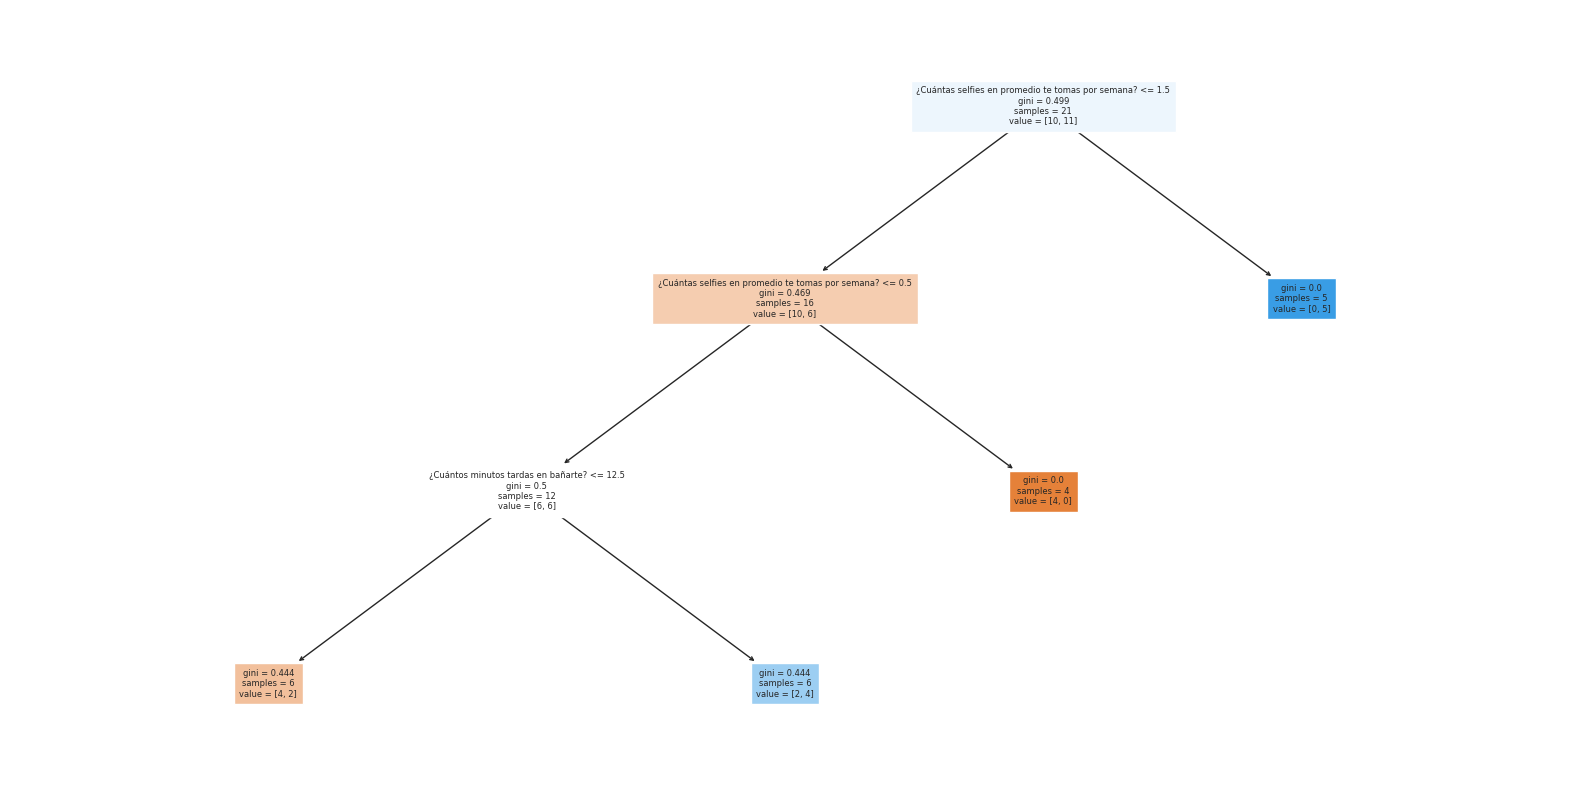

In [37]:
tree_classifier = ptree.named_steps['tree']
# ohe = ptree.named_steps['encoder']
# feature_names = ohe.get_feature_names_out(X.columns)

plt.figure(figsize=(20,10))
plot_tree(tree_classifier, feature_names=X.columns.to_list(), filled=True, fontsize=6)
plt.show()

In [ ]:
tree_classifier

In [149]:
df_test = pd.read_csv("nosconocemos (1) - test.csv")
X_test = df_test[num_columns]

In [59]:
df_test

,id,¿Cuántas selfies en promedio te tomas por semana?,¿Cuál es la temperatura con la que sueles bañarte?,¿Cuántos minutos tardas en bañarte?,¿Te gusta bailar?,¿Cuál es tu género de película favorito?,¿Cuántas cervezas (350ml aprox.) tomas en una fiesta? (0 indica abstinencia),¿Cuántos piercings tienes?,¿Cuántos tatuajes tienes?,¿Cuántas mascotas tienes?,¿Algo más que desees agregar?
0,1,1,Caliente,15,No,Acción,10,0,0,2,me gusta el rancho escondido
1,2,0,Ambas,10,Si,Acción,1,0,0,1,Sin comentarios
2,3,0,Ambas,20,Si,Acción,1,0,0,7,Me espanto profe aaaaaa
3,4,0,Ambas,10,Si,Otro,3,0,0,0,"No, todo bien"
4,5,2,Caliente,25,No,Romance,0,0,0,1,No por el momento xD


In [154]:
X_test = df_test[num_columns]

In [155]:
classifier.predict(X_test)

array([0, 1, 1, 1, 1])

In [157]:
tree_classifier.predict(X_test)

array([0, 0, 1, 0, 1])

In [158]:
import pickle

nombre_archivo = "practica3.pkl"

# Guardar el DataFrame en el archivo pickle
with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(tree_classifier, archivo)


In [63]:
X_test

,¿Cuántas selfies en promedio te tomas por semana?,¿Cuántos minutos tardas en bañarte?,¿Cuántas cervezas (350ml aprox.) tomas en una fiesta? (0 indica abstinencia),¿Cuántos piercings tienes?,¿Cuántos tatuajes tienes?,¿Cuántas mascotas tienes?
22,0,10,0,0,0,3
8,1,6,0,0,0,4
3,1,10,4,0,0,0
1,2,20,4,0,0,5
17,0,15,1,0,0,5
26,5,10,8,0,0,0
19,0,10,0,0,0,2
25,0,10,1,1,0,0
9,0,20,3,6,0,0
2,0,20,5,0,0,3


In [48]:
X = df[num_columns]
y = df[tgt]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y ,random_state=12, shuffle=True)

In [208]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [209]:
# Espacio hiperparametral
space = {
    'criterion': hp.choice('criterion', ['gini', 'entropy']),
    'splitter': hp.choice('splitter', ['best', 'random']),
    'max_depth': hp.quniform('max_depth', 5, 10, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 5, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 5, 1)
}



def objective(space):
    # Codificación One Hot
    # encoder = OneHotEncoder(sparse=False, drop='first')
    # X_train_encoded = encoder.fit_transform(X_train[cat_columns])

    classifier = DecisionTreeClassifier(
        criterion=space['criterion'],
        splitter=space['splitter'],
        max_depth=int(space['max_depth']),
        min_samples_split=int(space['min_samples_split']),
        min_samples_leaf=int(space['min_samples_leaf']),
        random_state=12
    )

    score = cross_val_score(classifier, X_train, y_train, cv=5).mean()

    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)

print(best)

 74%|███████▍  | 74/100 [00:05<00:02, 12.82trial/s, best loss: -0.6599999999999999]


KeyboardInterrupt: ignored

In [190]:
best_params = {
    'criterion': ['gini', 'entropy'][best['criterion']],
    'splitter': ['best', 'random'][best['splitter']],
    'max_depth': int(best['max_depth']),
    'min_samples_split': int(best['min_samples_split']),
    'min_samples_leaf': int(best['min_samples_leaf'])
}

# Crear el Pipeline
ptree = Pipeline([
    # ('encoder', OneHotEncoder(sparse=False, drop='first')),
    ('tree', DecisionTreeClassifier(**best_params))
])

# Entrenar el pipeline
ptree.fit(X_train, y_train)

Pipeline(steps=[('tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                        min_samples_leaf=2, min_samples_split=4,
                                        splitter='random'))])

In [191]:
def get_cv_scores_report_classification(estimator, X, y, n_splits):

    cv_scores = cross_validate(
                    estimator = estimator,
                    X         = X,
                    y         = y,
                    scoring   = {
                                'accuracy': make_scorer(accuracy_score),
                                'recall': make_scorer(recall_score, average='weighted'),
                                'roc_auc_ovr': 'roc_auc_ovr'
                                },
                    cv        = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=5, random_state=333),
                )

    # Convertir el diccionario a dataframe para facilitar la visualización
    cv_scores = pd.DataFrame(cv_scores)
    print(f"Accuracy en CV: mean {cv_scores.test_accuracy.mean():.2f}, std {cv_scores.test_accuracy.std():.2f}")
    print(f"Recall en CV: mean {cv_scores.test_recall.mean():.2f}, std {cv_scores.test_recall.std():.2f}")


get_cv_scores_report_classification(ptree,X_test,y_test,5)

Accuracy en CV: mean 0.50, std 0.29
Recall en CV: mean 0.50, std 0.29


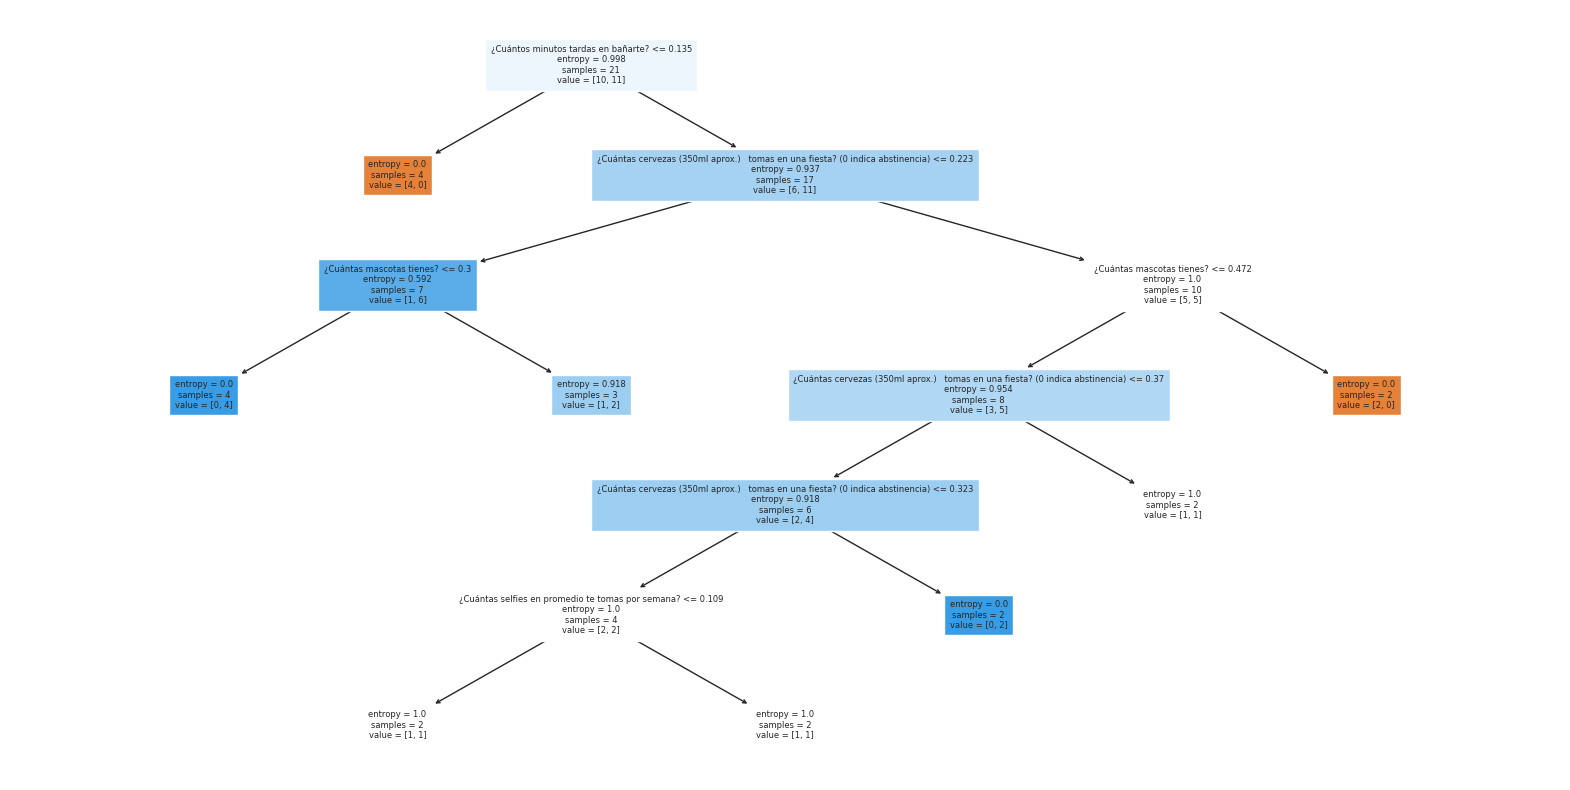

In [192]:
tree_classifier = ptree.named_steps['tree']
# ohe = ptree.named_steps['encoder']
# feature_names = ohe.get_feature_names_out(X.columns)

plt.figure(figsize=(20,10))
plot_tree(tree_classifier, feature_names=X.columns, filled=True, fontsize=6)
plt.show()

## Decision Tree

In [161]:
X = df[num_columns + list(cat_ohe.columns)]
y = df[tgt]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y ,random_state=12, shuffle=True)

In [162]:
# Espacio hiperparametral
space = {
    'criterion': hp.choice('criterion', ['gini', 'entropy']),
    'splitter': hp.choice('splitter', ['best', 'random']),
    'max_depth': hp.quniform('max_depth', 5, 10, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 5, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 5, 1)
}



def objective(space):
    # Codificación One Hot
    # encoder = OneHotEncoder(sparse=False, drop='first')
    # X_train_encoded = encoder.fit_transform(X_train[cat_columns])

    classifier = DecisionTreeClassifier(
        criterion=space['criterion'],
        splitter=space['splitter'],
        max_depth=int(space['max_depth']),
        min_samples_split=int(space['min_samples_split']),
        min_samples_leaf=int(space['min_samples_leaf']),
        random_state=12
    )

    score = cross_val_score(classifier, X_train, y_train, cv=5).mean()

    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)

print(best)

100%|██████████| 100/100 [00:11<00:00,  8.78trial/s, best loss: -0.52]
{'criterion': 1, 'max_depth': 5.0, 'min_samples_leaf': 4.0, 'min_samples_split': 5.0, 'splitter': 1}


In [163]:
best_params = {
    'criterion': ['gini', 'entropy'][best['criterion']],
    'splitter': ['best', 'random'][best['splitter']],
    'max_depth': int(best['max_depth']),
    'min_samples_split': int(best['min_samples_split']),
    'min_samples_leaf': int(best['min_samples_leaf'])
}

# Crear el Pipeline
ptree = Pipeline([
    # ('encoder', OneHotEncoder(sparse=False, drop='first')),
    ('tree', DecisionTreeClassifier(**best_params))
])

# Entrenar el pipeline
ptree.fit(X_train, y_train)

Pipeline(steps=[('tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=4, min_samples_split=5,
                                        splitter='random'))])

In [164]:
def get_cv_scores_report_classification(estimator, X, y, n_splits):

    cv_scores = cross_validate(
                    estimator = estimator,
                    X         = X,
                    y         = y,
                    scoring   = {
                                'accuracy': make_scorer(accuracy_score),
                                'recall': make_scorer(recall_score, average='weighted'),
                                'roc_auc_ovr': 'roc_auc_ovr'
                                },
                    cv        = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=5, random_state=333),
                )

    # Convertir el diccionario a dataframe para facilitar la visualización
    cv_scores = pd.DataFrame(cv_scores)
    print(f"Accuracy en CV: mean {cv_scores.test_accuracy.mean():.2f}, std {cv_scores.test_accuracy.std():.2f}")
    print(f"Recall en CV: mean {cv_scores.test_recall.mean():.2f}, std {cv_scores.test_recall.std():.2f}")


get_cv_scores_report_classification(ptree,X_test,y_test,5)

Accuracy en CV: mean 0.46, std 0.14
Recall en CV: mean 0.46, std 0.14


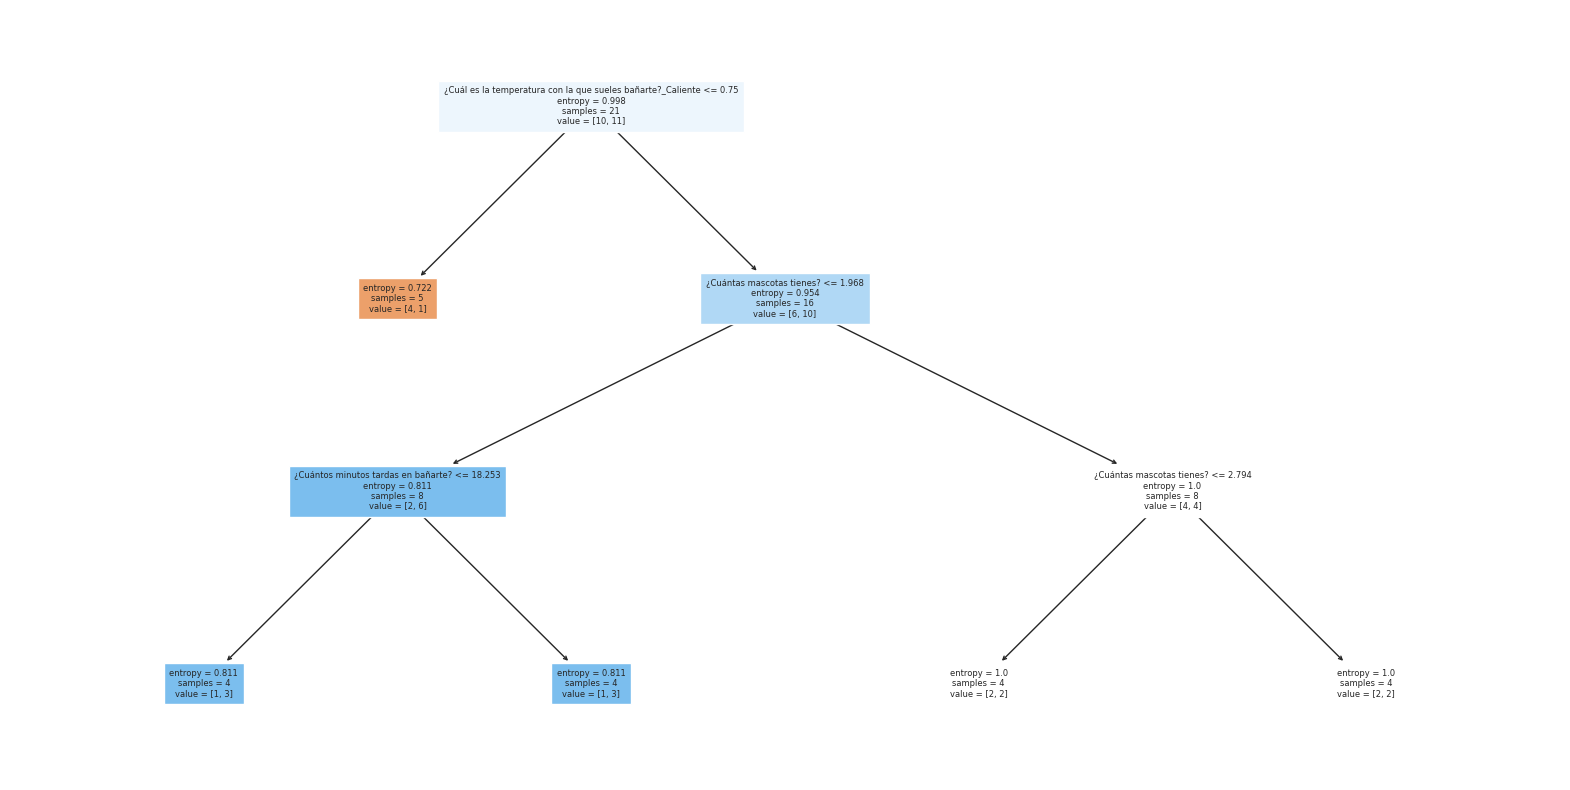

In [165]:
tree_classifier = ptree.named_steps['tree']
# ohe = ptree.named_steps['encoder']
# feature_names = ohe.get_feature_names_out(X.columns)

plt.figure(figsize=(20,10))
plot_tree(tree_classifier, feature_names=X.columns, filled=True, fontsize=6)
plt.show()

## Random Forest

In [170]:
# Espacio hiperparametral
space = {
    'n_estimators': hp.choice('n_estimators', np.arange(50, 501, 50, dtype=int)),
    'max_depth': hp.choice('max_depth', np.arange(5, 10, 1, dtype=int)),
    'min_samples_split': hp.uniform('min_samples_split', 0.01, 0.5),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.01, 0.5),
    'max_features': hp.choice('max_features', ['sqrt', 'log2'])  # Aquí cambiamos 'auto' por 'sqrt'
}

def objective(params):
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds)
    return {'loss': 1 - f1, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)


100%|██████████| 100/100 [00:51<00:00,  1.96trial/s, best loss: 0.33333333333333337]


In [171]:
best_params = space_eval(space, best)

print("Mejores parámetros:", best_params)

Mejores parámetros: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 0.41873744118802947, 'min_samples_split': 0.27454033127492294, 'n_estimators': 200}


In [173]:
rfr = RandomForestClassifier(**best_params)
rfr.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=0.41873744118802947,
                       min_samples_split=0.27454033127492294, n_estimators=200)

In [174]:
get_cv_scores_report_classification(rfr,X_test,y_test,5)

Accuracy en CV: mean 0.50, std 0.00
Recall en CV: mean 0.50, std 0.00


In [180]:
X = df[num_columns]
y = df[tgt]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y ,random_state=12, shuffle=True)

In [181]:
# Espacio hiperparametral
space = {
    'n_estimators': hp.choice('n_estimators', np.arange(50, 501, 50, dtype=int)),
    'max_depth': hp.choice('max_depth', np.arange(5, 10, 1, dtype=int)),
    'min_samples_split': hp.uniform('min_samples_split', 0.01, 0.5),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.01, 0.5),
    'max_features': hp.choice('max_features', ['sqrt', 'log2'])  # Aquí cambiamos 'auto' por 'sqrt'
}

def objective(params):
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds)
    return {'loss': 1 - f1, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)


100%|██████████| 100/100 [00:48<00:00,  2.07trial/s, best loss: 0.33333333333333337]


In [182]:
space = {
    'n_estimators': hp.choice('n_estimators', np.arange(50, 501, 50, dtype=int)),
    'max_depth': hp.choice('max_depth', np.arange(5, 30, 1, dtype=int)),
    'min_samples_split': hp.uniform('min_samples_split', 0.01, 0.5),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.01, 0.5),
    'max_features': hp.choice('max_features', ['sqrt', 'log2'])  
}

def objective(params):
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds,average='weighted' )
    return {'loss': 1 - f1, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
best_params = space_eval(space, best)

print("Mejores parámetros:", best_params)space = {
    'n_estimators': hp.choice('n_estimators', np.arange(50, 501, 50, dtype=int)),
    'max_depth': hp.choice('max_depth', np.arange(5, 30, 1, dtype=int)),
    'min_samples_split': hp.uniform('min_samples_split', 0.01, 0.5),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.01, 0.5),
    'max_features': hp.choice('max_features', ['sqrt', 'log2'])  
}

def objective(params):
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds,average='weighted' )
    return {'loss': 1 - f1, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
best_params = space_eval(space, best)

print("Mejores parámetros:", best_params)

Mejores parámetros: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 0.3579155490208919, 'min_samples_split': 0.11684299167441763, 'n_estimators': 150}
Accuracy en CV: mean 0.42, std 0.34
Recall en CV: mean 0.42, std 0.34
